In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
from sklearn.decomposition import PCA
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('/content/drive/MyDrive/708 course/708 assessment 1/wine customer.csv')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
mean_income = df['Income'].mean()
df['Income'].fillna(mean_income, inplace=True)

In [6]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [7]:
print (df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [8]:
columns_to_drop = ['ID','MntFruits','Dt_Customer','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']
df.drop(columns=columns_to_drop, inplace=True)

In [9]:
df.shape

(2240, 22)

In [10]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   NumDealsPurchases    2240 non-null   int64  
 9   NumWebPurchases      2240 non-null   int64  
 10  NumCatalogPurchases  2240 non-null   int64  
 11  NumStorePurchases    2240 non-null   int64  
 12  NumWebVisitsMonth    2240 non-null   int64  
 13  AcceptedCmp3         2240 non-null   int64  
 14  AcceptedCmp4         2240 non-null   int64  
 15  AcceptedCmp5         2240 non-null   i

In [12]:
columns_to_encode = ['Education', 'Marital_Status']
one_hot_encoded=pd.get_dummies(df[columns_to_encode],prefix=columns_to_encode,dtype=int)
df_encoded=pd.concat([df,one_hot_encoded],axis=1)
print('\nOne hot encoded dataset:')
print(df_encoded)


One hot encoded dataset:
      Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation        Married  61223.0        0         1   
2236        1946         PhD       Together  64014.0        2         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

      Recency  MntWines  NumDealsPurchases  NumWebPurchases  ...  \
0    

In [13]:
df_encoded

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,NumDealsPurchases,NumWebPurchases,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,Graduation,Single,58138.0,0,0,58,635,3,8,...,0,0,0,0,0,0,1,0,0,0
1,1954,Graduation,Single,46344.0,1,1,38,11,2,1,...,0,0,0,0,0,0,1,0,0,0
2,1965,Graduation,Together,71613.0,0,0,26,426,1,8,...,0,0,0,0,0,0,0,1,0,0
3,1984,Graduation,Together,26646.0,1,0,26,11,2,2,...,0,0,0,0,0,0,0,1,0,0
4,1981,PhD,Married,58293.0,1,0,94,173,5,5,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,46,709,2,9,...,0,0,0,0,0,1,0,0,0,0
2236,1946,PhD,Together,64014.0,2,1,56,406,7,8,...,0,1,0,0,0,0,0,1,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,91,908,1,2,...,0,0,0,0,1,0,0,0,0,0
2238,1956,Master,Together,69245.0,0,1,8,428,2,6,...,1,0,0,0,0,0,0,1,0,0


In [14]:
df=df_encoded

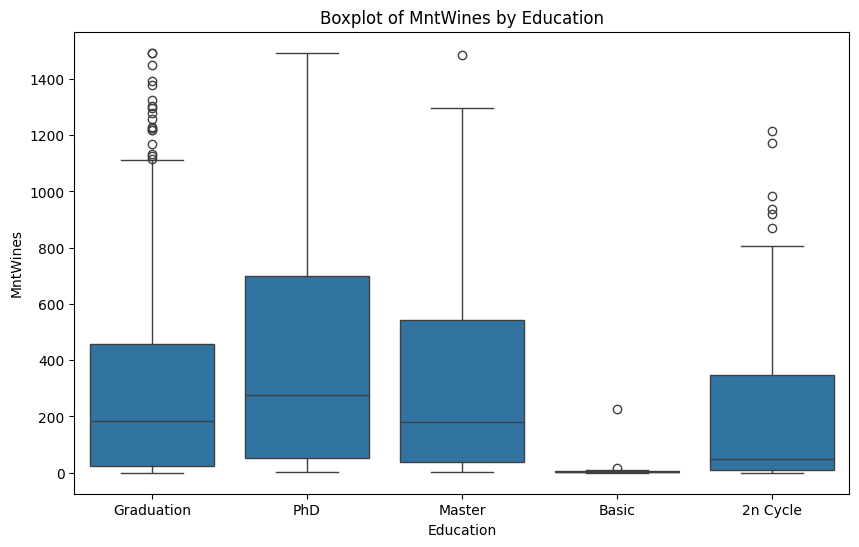

In [15]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='MntWines', data=df)
plt.title('Boxplot of MntWines by Education')
plt.xlabel('Education')
plt.ylabel('MntWines')
plt.show()

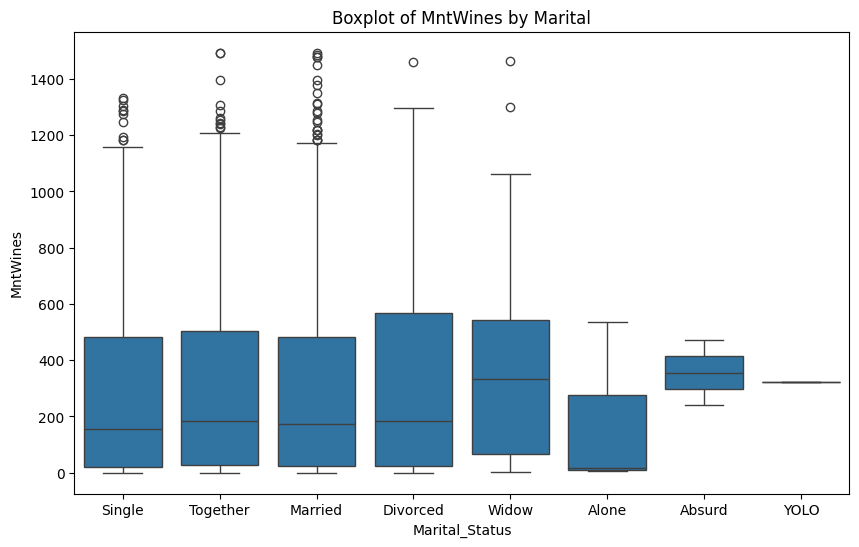

In [16]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Marital_Status', y='MntWines', data=df)
plt.title('Boxplot of MntWines by Marital')
plt.xlabel('Marital_Status')
plt.ylabel('MntWines')
plt.show()

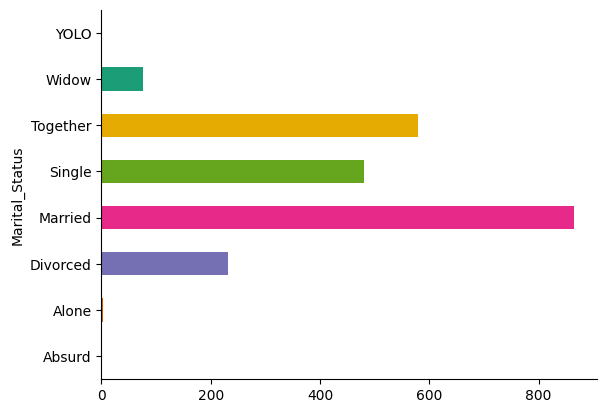

In [17]:
# Marital_Status
df.groupby('Marital_Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Text(0.5, 1.0, 'Wine Spending by Age')

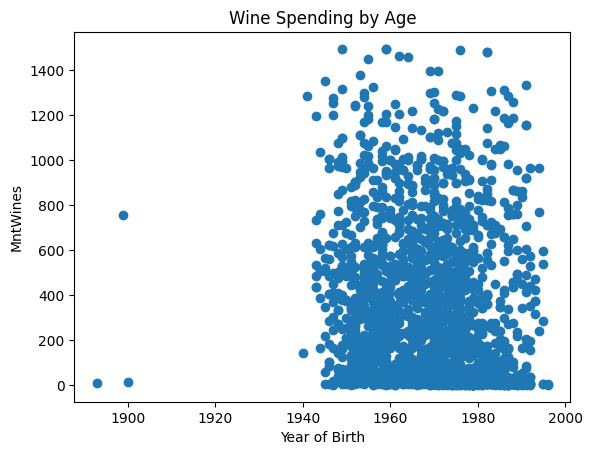

In [18]:
# Wine Spending by Age
plt.scatter(df['Year_Birth'], df['MntWines'])
plt.xlabel('Year of Birth')
plt.ylabel('MntWines')
plt.title('Wine Spending by Age')

Text(0.5, 1.0, 'Wine Spending vs Recency')

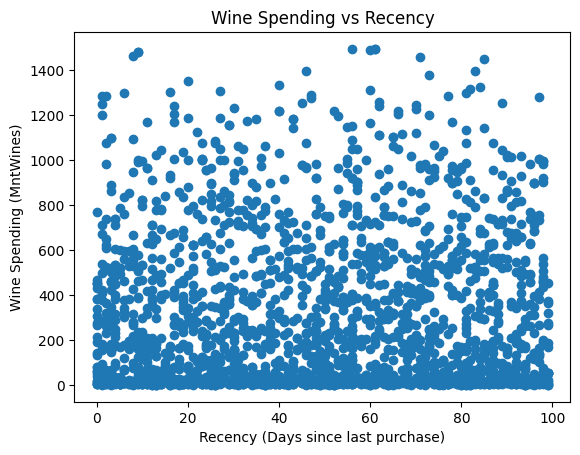

In [19]:
# Wine Spending vs Recency
plt.scatter(df['Recency'], df['MntWines'])
plt.xlabel('Recency (Days since last purchase)')
plt.ylabel('Wine Spending (MntWines)')
plt.title('Wine Spending vs Recency')

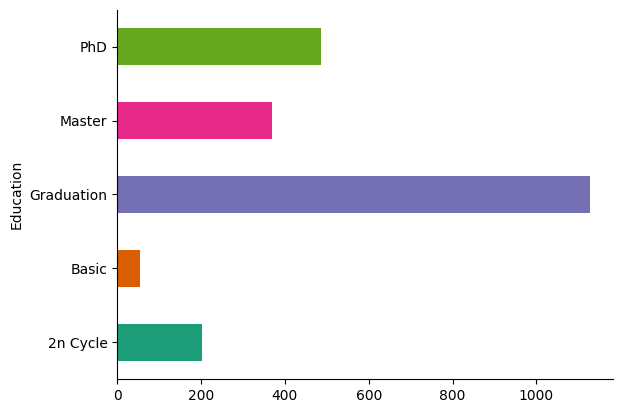

In [20]:
# Education
df.groupby('Education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [21]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,2.325000,4.084821,2.662054,5.790179,...,0.165179,0.216964,0.000893,0.001339,0.103571,0.385714,0.214286,0.258929,0.034375,0.000893
std,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,1.932238,2.778714,2.923101,3.250958,...,0.371425,0.412270,0.029874,0.036580,0.304772,0.486872,0.410418,0.438144,0.182231,0.029874
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,2.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,2.000000,4.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,3.000000,6.000000,4.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,15.000000,27.000000,28.000000,13.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
df.dtypes

Year_Birth                   int64
Education                   object
Marital_Status              object
Income                     float64
Kidhome                      int64
Teenhome                     int64
Recency                      int64
MntWines                     int64
NumDealsPurchases            int64
NumWebPurchases              int64
NumCatalogPurchases          int64
NumStorePurchases            int64
NumWebVisitsMonth            int64
AcceptedCmp3                 int64
AcceptedCmp4                 int64
AcceptedCmp5                 int64
AcceptedCmp1                 int64
AcceptedCmp2                 int64
Complain                     int64
Z_CostContact                int64
Z_Revenue                    int64
Response                     int64
Education_2n Cycle           int64
Education_Basic              int64
Education_Graduation         int64
Education_Master             int64
Education_PhD                int64
Marital_Status_Absurd        int64
Marital_Status_Alone

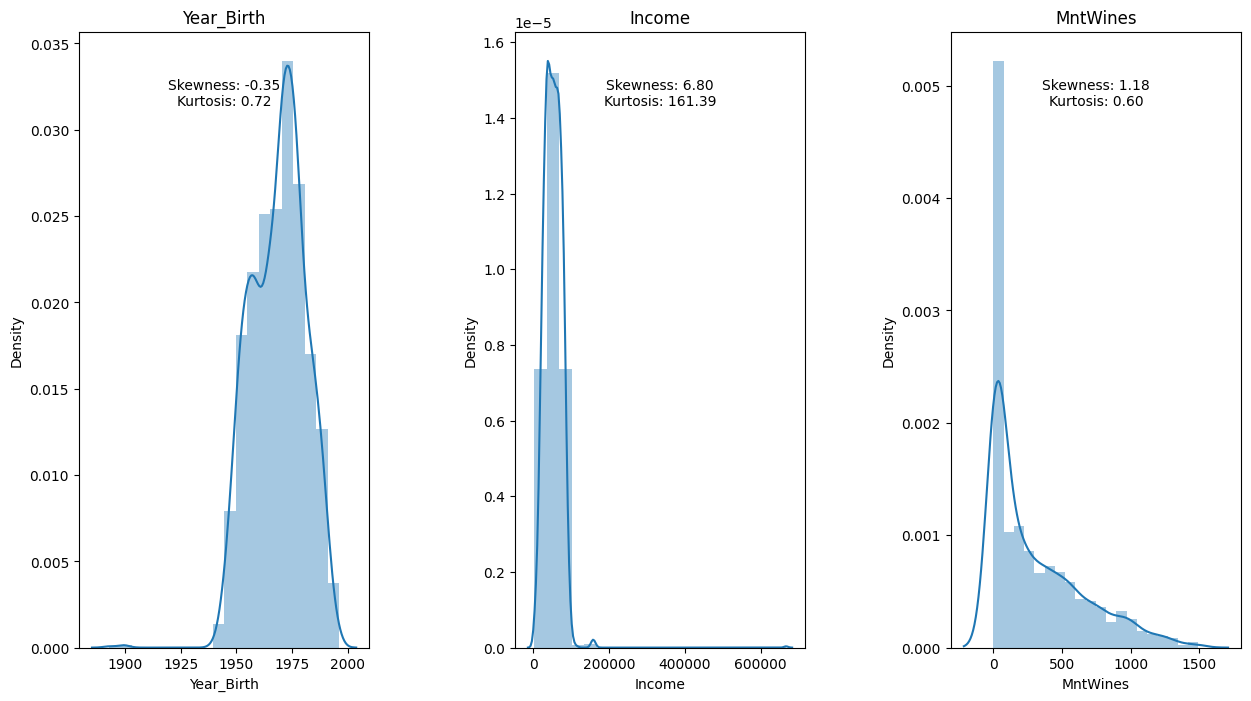

In [23]:
plt.figure(1,figsize=(15,8))
n=0
for x in ['Year_Birth','Income', 'MntWines']:
  n+=1
  plt.subplot(1,3,n)
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.distplot(df[x],bins=20)
  plt.title(f'{x}')

  skewness = df[x].skew()
  kurtosis = df[x].kurtosis()

  plt.text(0.5, 0.9, f'Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}', horizontalalignment='center',
             verticalalignment='center', transform=plt.gca().transAxes)
plt.show()

In [24]:
df.drop(columns=['Education','Marital_Status'],inplace=True)

In [25]:
z_scores = (df - df.mean()) / df.std()
threshold = 3
outliers = df[(np.abs(z_scores) > threshold).any(axis=1) == True]
print(outliers)

# Get the indices of the outlier rows
outlier_indices = outliers.index

# Use the indices to drop the outlier rows
df_no_outliers = df.drop(outlier_indices)
df = df_no_outliers

      Year_Birth         Income  Kidhome  Teenhome  Recency  MntWines  \
9           1950    5648.000000        1         1       68        28   
11          1976    7500.000000        0         0       59         6   
15          1946   82800.000000        0         0       23      1006   
18          1949   76995.000000        0         1       91      1012   
19          1985   33812.000000        1         0       86         4   
...          ...            ...      ...       ...      ...       ...   
2228        1978   52247.251354        0         0       53        32   
2230        1984   11012.000000        1         0       82        24   
2233        1977  666666.000000        1         0       23         9   
2236        1946   64014.000000        2         1       56       406   
2237        1981   56981.000000        0         0       91       908   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
9                     1                1                  

In [26]:
df.shape

(1446, 33)

In [27]:
# Preprocess Data (Scaling)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns) # Convert scaled data back to DataFrame

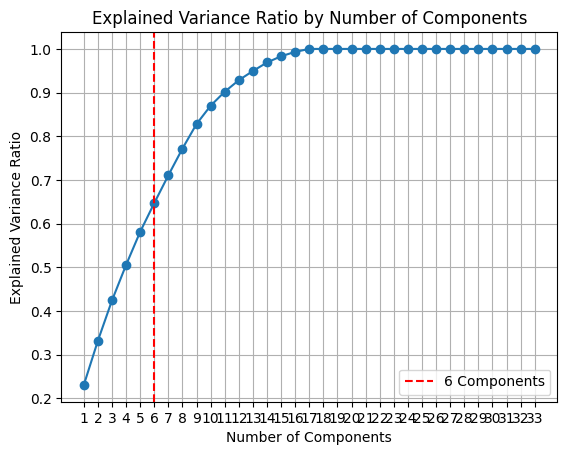

In [28]:
# Perform PCA for a range of components
pca_range = range(1, len(df.columns) + 1)
explained_variance = []

for n in pca_range:
    pca = PCA(n_components=n)
    x_pca = pca.fit_transform(df_scaled)
    explained_variance.append(pca.explained_variance_ratio_.sum())

# Plot the explained variance ratio
plt.plot(pca_range, explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.xticks(pca_range)
plt.grid(True)
# Highlight the significant variance captured by 6 components
plt.axvline(x=6, color='red', linestyle='--', label='6 Components')
plt.legend()
plt.show()

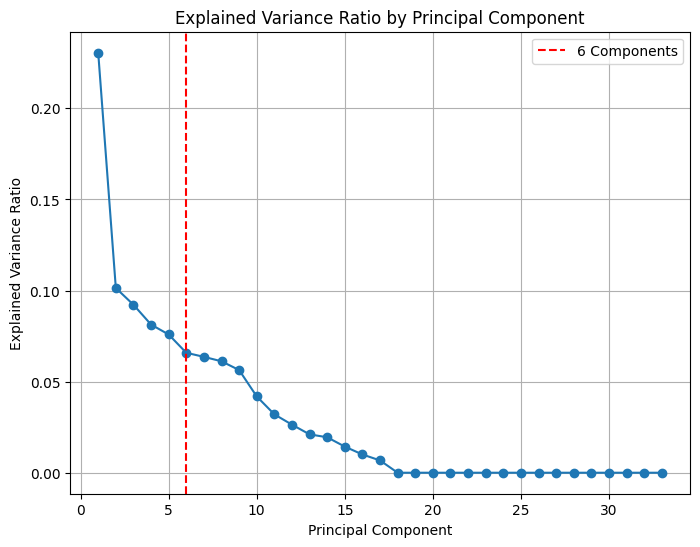

In [29]:
# Explained Variance Ratio
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')

# Highlight the significance captured by the first 6 components
highlighted_components = 6
plt.axvline(x=highlighted_components, color='red', linestyle='--', label='6 Components')

plt.legend()
plt.grid(True)
plt.show()


In [30]:
# Perform PCA
pca1 = PCA(n_components=6)
x_pca = pca1.fit_transform(df_scaled)

# Create a DataFrame with the PCA results
x = pd.DataFrame(data=x_pca)

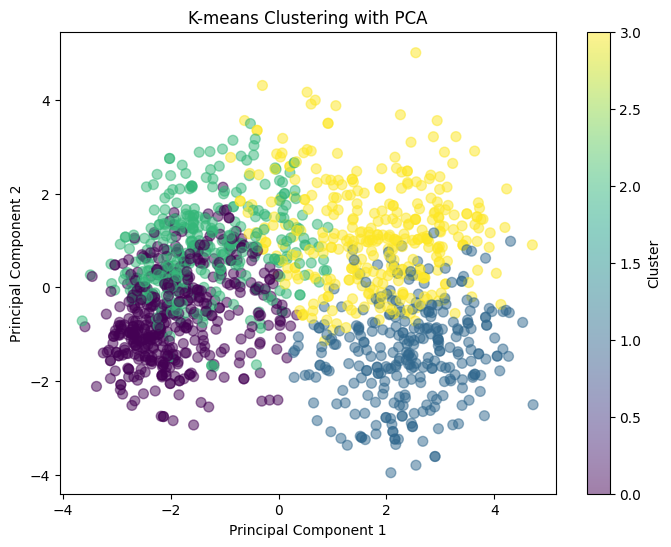

In [31]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(x_pca)

# Get cluster labels
cluster_labels = kmeans.labels_
# Add cluster labels to the final DataFrame
df_scaled['Cluster'] = cluster_labels

# Scatter plot of the first two principal components with cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.title('K-means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

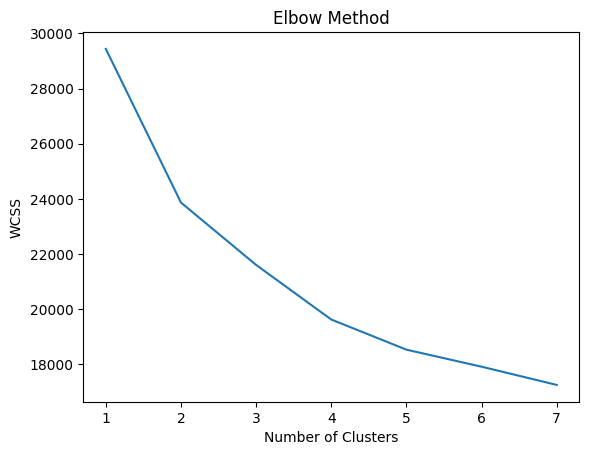

In [32]:
# Elbow Method
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Silhouette score for 2 clusters: 0.18205232447296296
Silhouette score for 3 clusters: 0.15607147557572768
Silhouette score for 4 clusters: 0.16865798577464935
Silhouette score for 5 clusters: 0.18287544064122255
Silhouette score for 6 clusters: 0.18400455516275568
Silhouette score for 7 clusters: 0.14143137758125104
Silhouette score for 8 clusters: 0.1379342448091526


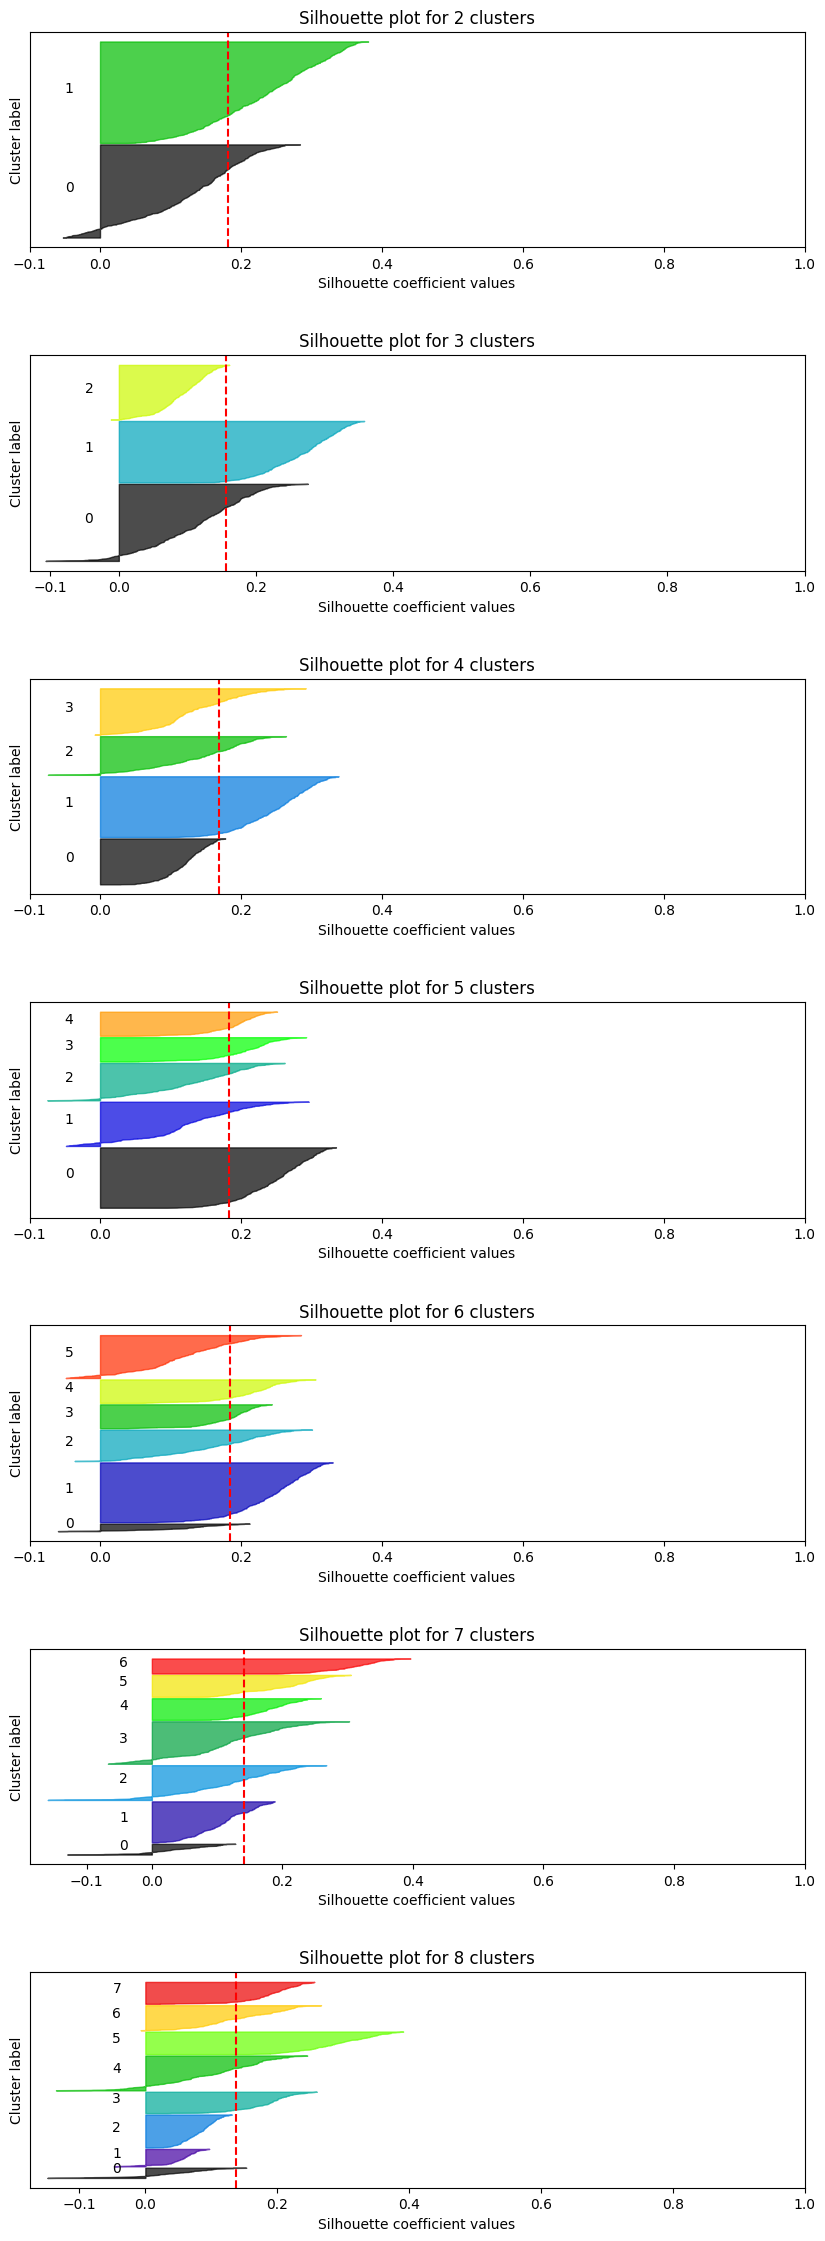

In [33]:
# generate the kmean silhouette plot
# Create subplot grid
range_n_clusters = [2, 3, 4, 5, 6,7,8]
fig, ax = plt.subplots(len(range_n_clusters), 1, figsize=(10, len(range_n_clusters) * 4))

# Add vertical spacing between subplots
plt.subplots_adjust(hspace=0.5)  # Adjust the spacing as needed

for i, n_clusters in enumerate(range_n_clusters):
    # Initialize KMeans with n_clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, init='k-means++')
    cluster_labels = kmeans.fit_predict(df_scaled)

    # Compute silhouette scores
    silhouette_avg = silhouette_score(df_scaled,cluster_labels)
    sample_silhouette_values = silhouette_samples(df_scaled, cluster_labels)

    # Print silhouette score for each cluster
    print(f'Silhouette score for {n_clusters} clusters: {silhouette_avg}')

    y_lower = 10
    for j in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster j
        jth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]
        jth_cluster_silhouette_values.sort()

        size_cluster_j = jth_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        # Color each cluster silhouette plot
        color = plt.cm.nipy_spectral(float(j) / n_clusters)
        ax[i].fill_betweenx(np.arange(y_lower, y_upper),
                             0, jth_cluster_silhouette_values,
                             facecolor=color, edgecolor=color, alpha=0.7)

        # Label silhouette plots with their cluster numbers at the middle
        ax[i].text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))

        # Compute new y_lower for the next plot
        y_lower = y_upper + 10

    ax[i].set_title(f'Silhouette plot for {n_clusters} clusters')
    ax[i].set_xlabel('Silhouette coefficient values')
    ax[i].set_ylabel('Cluster label')

    # The vertical line for average silhouette score of all the values
    ax[i].axvline(x=silhouette_avg, color="red", linestyle="--")

    ax[i].set_yticks([])
    ax[i].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

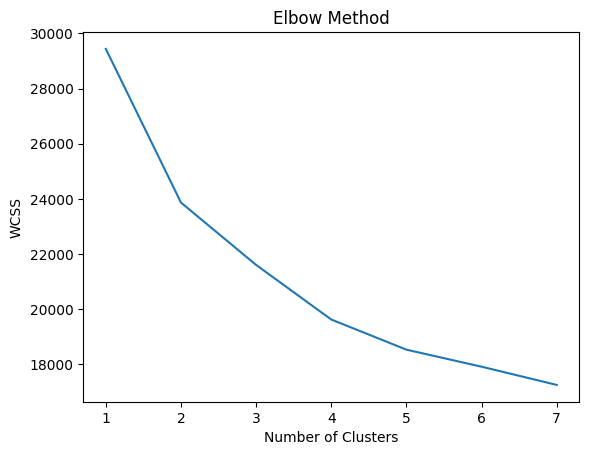

In [34]:
X=df_scaled
# Elbow Method
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

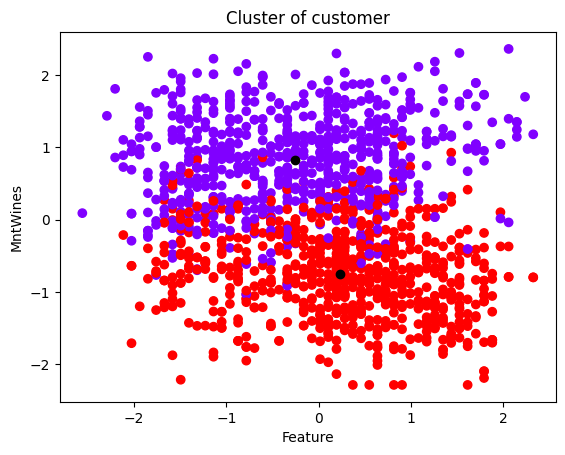

In [35]:
# Fit KMeans with optimal number of clusters
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans.fit(X)

# Get cluster labels
labels = kmeans.labels_  # Use labels_ (plural) instead of label_

# Visualize clusters
X_array = X.values # Extract values of the DataFrame as a NumPy array
plt.scatter(X_array[:,0],X_array[:,1], c=kmeans.labels_,cmap='rainbow') # Use labels_ (plural) instead of label_
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Cluster of customer')
plt.xlabel('Feature')
plt.ylabel('MntWines')
plt.show()

Silhouette score for 2 clusters: 0.18205232447296296
Silhouette score for 3 clusters: 0.15607147557572768
Silhouette score for 4 clusters: 0.16865798577464935
Silhouette score for 5 clusters: 0.18287544064122255
Silhouette score for 6 clusters: 0.18400455516275568
Silhouette score for 7 clusters: 0.14143137758125104
Silhouette score for 8 clusters: 0.1379342448091526


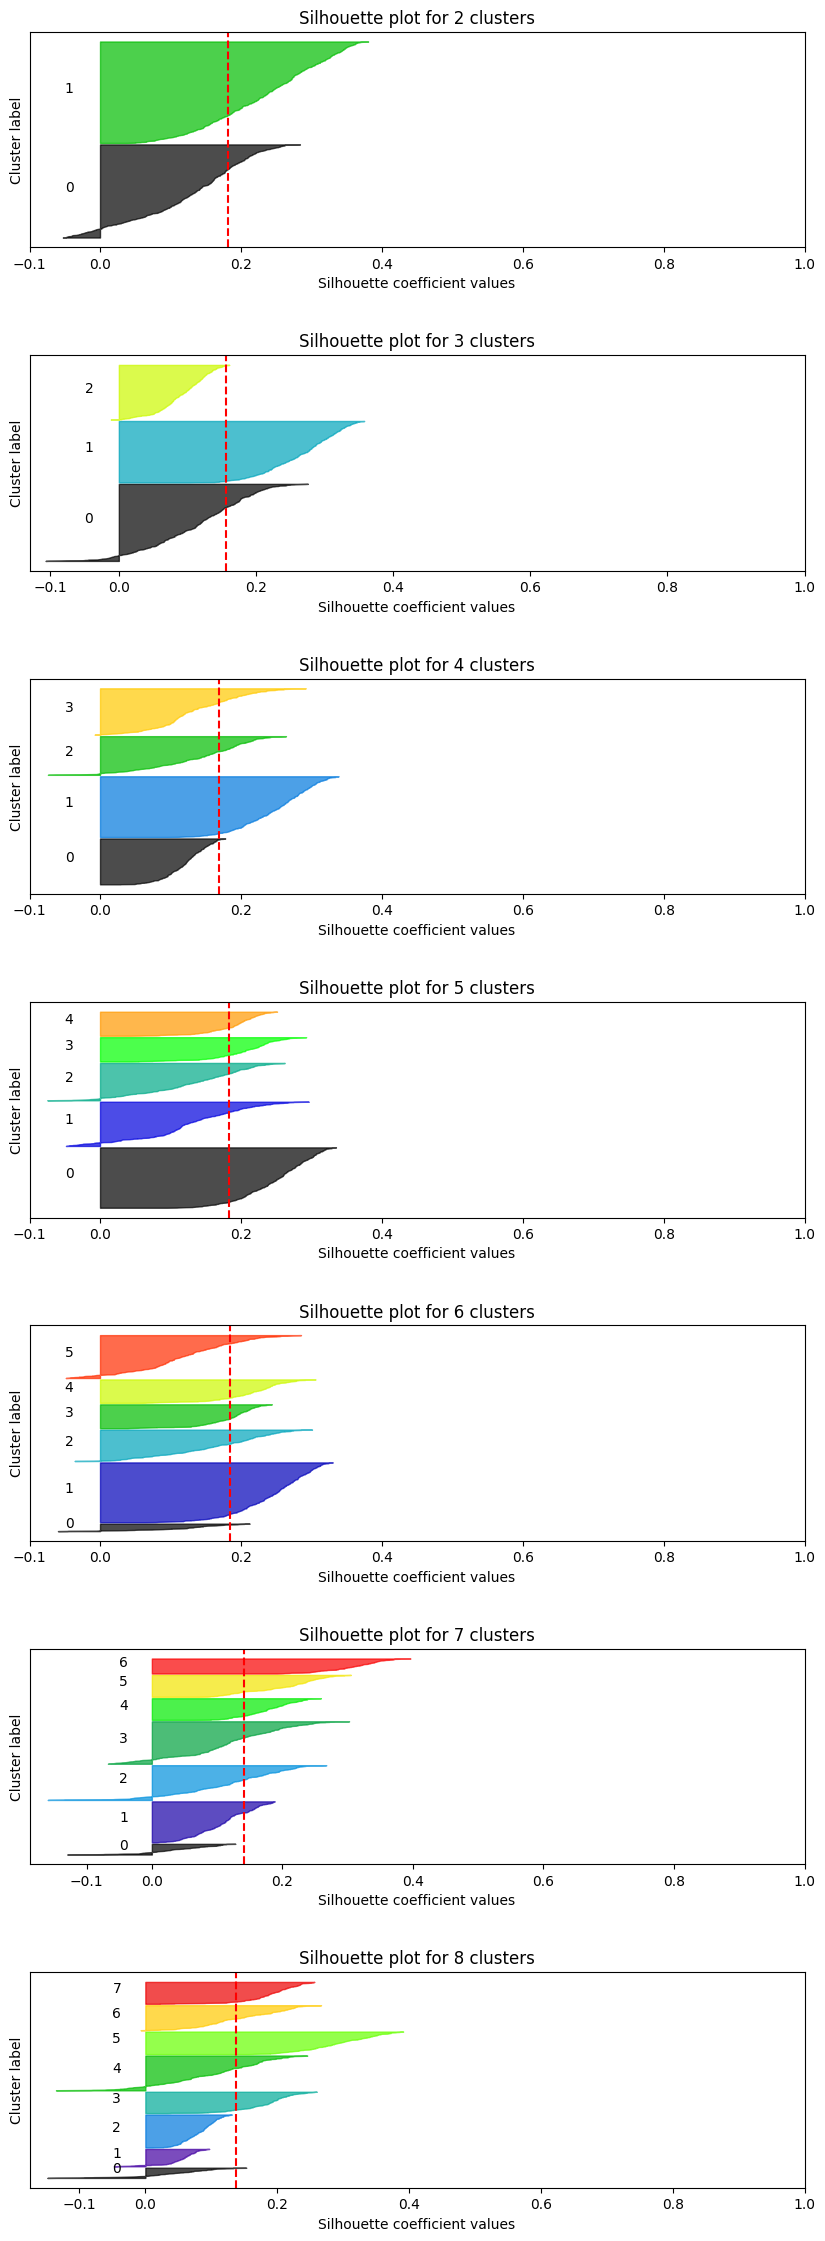

In [36]:
# generate the kmean silhouette plot
# Create subplot grid
range_n_clusters = [2, 3, 4, 5, 6,7,8]
fig, ax = plt.subplots(len(range_n_clusters), 1, figsize=(10, len(range_n_clusters) * 4))

# Add vertical spacing between subplots
plt.subplots_adjust(hspace=0.5)  # Adjust the spacing as needed

for i, n_clusters in enumerate(range_n_clusters):
    # Initialize KMeans with n_clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, init='k-means++')
    cluster_labels = kmeans.fit_predict(X)

    # Compute silhouette scores
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    # Print silhouette score for each cluster
    print(f'Silhouette score for {n_clusters} clusters: {silhouette_avg}')

    y_lower = 10
    for j in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster j
        jth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]
        jth_cluster_silhouette_values.sort()

        size_cluster_j = jth_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        # Color each cluster silhouette plot
        color = plt.cm.nipy_spectral(float(j) / n_clusters)
        ax[i].fill_betweenx(np.arange(y_lower, y_upper),
                             0, jth_cluster_silhouette_values,
                             facecolor=color, edgecolor=color, alpha=0.7)

        # Label silhouette plots with their cluster numbers at the middle
        ax[i].text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))

        # Compute new y_lower for the next plot
        y_lower = y_upper + 10

    ax[i].set_title(f'Silhouette plot for {n_clusters} clusters')
    ax[i].set_xlabel('Silhouette coefficient values')
    ax[i].set_ylabel('Cluster label')

    # The vertical line for average silhouette score of all the values
    ax[i].axvline(x=silhouette_avg, color="red", linestyle="--")

    ax[i].set_yticks([])
    ax[i].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()


In [37]:
X1=df_scaled.loc[:,['Year_Birth','MntWines']].values
X2=df_scaled.loc[:,['Income','MntWines']].values

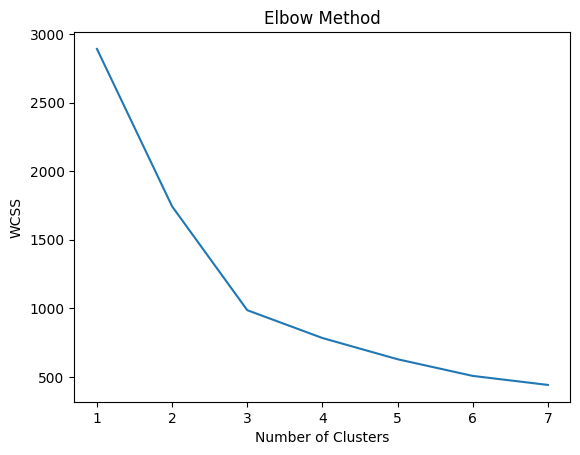

In [38]:
# Elbow Method
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

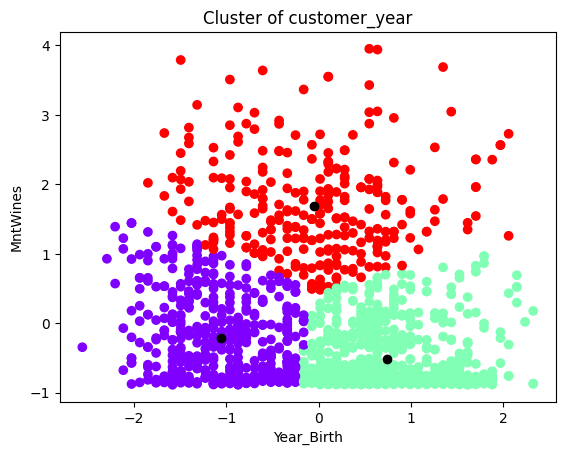

In [39]:
# Fit KMeans with optimal number of clusters (based on Elbow Method)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X1)

# Get cluster labels
labels = kmeans.labels_  # Use labels_ (plural) instead of label_

# Visualize clusters
plt.scatter(X1[:,0],X1[:,1], c=kmeans.labels_,cmap='rainbow') # Use labels_ (plural) instead of label_
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Cluster of customer_year')
plt.xlabel('Year_Birth')
plt.ylabel('MntWines')
plt.show()

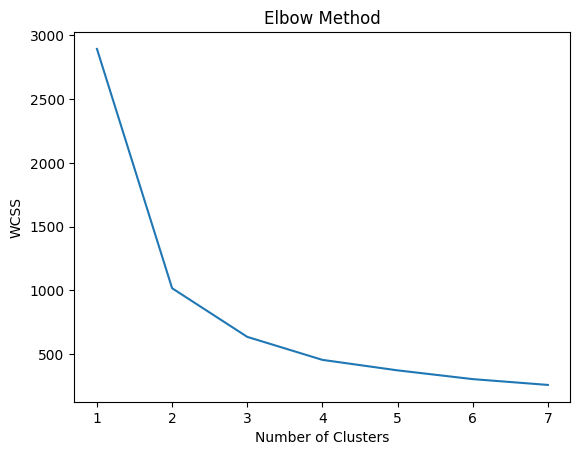

In [40]:
# Elbow Method
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

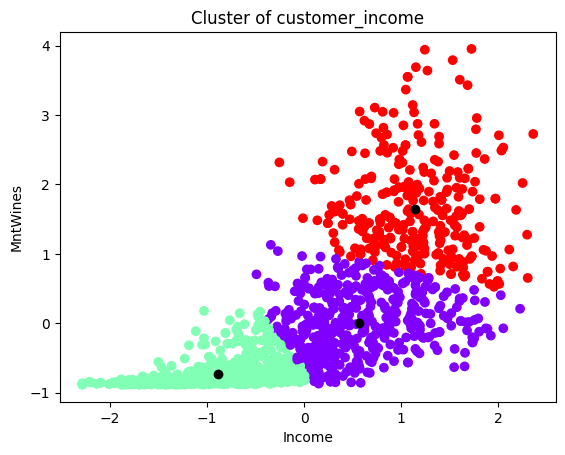

In [41]:
# Fit KMeans with optimal number of clusters (based on Elbow Method)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X2)

# Get cluster labels
labels = kmeans.labels_  # Use labels_ (plural) instead of label_

# Visualize clusters
plt.scatter(X2[:,0],X2[:,1], c=kmeans.labels_,cmap='rainbow') # Use labels_ (plural) instead of label_
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Cluster of customer_income')
plt.xlabel('Income')
plt.ylabel('MntWines')
plt.show()

Silhouette score for 2 clusters: 0.3974175019926197
Silhouette score for 3 clusters: 0.4512318569625324
Silhouette score for 4 clusters: 0.38108273759751154
Silhouette score for 5 clusters: 0.38045736911822586
Silhouette score for 6 clusters: 0.39864485832800384
Silhouette score for 7 clusters: 0.40131269724488194
Silhouette score for 8 clusters: 0.3816855488601584


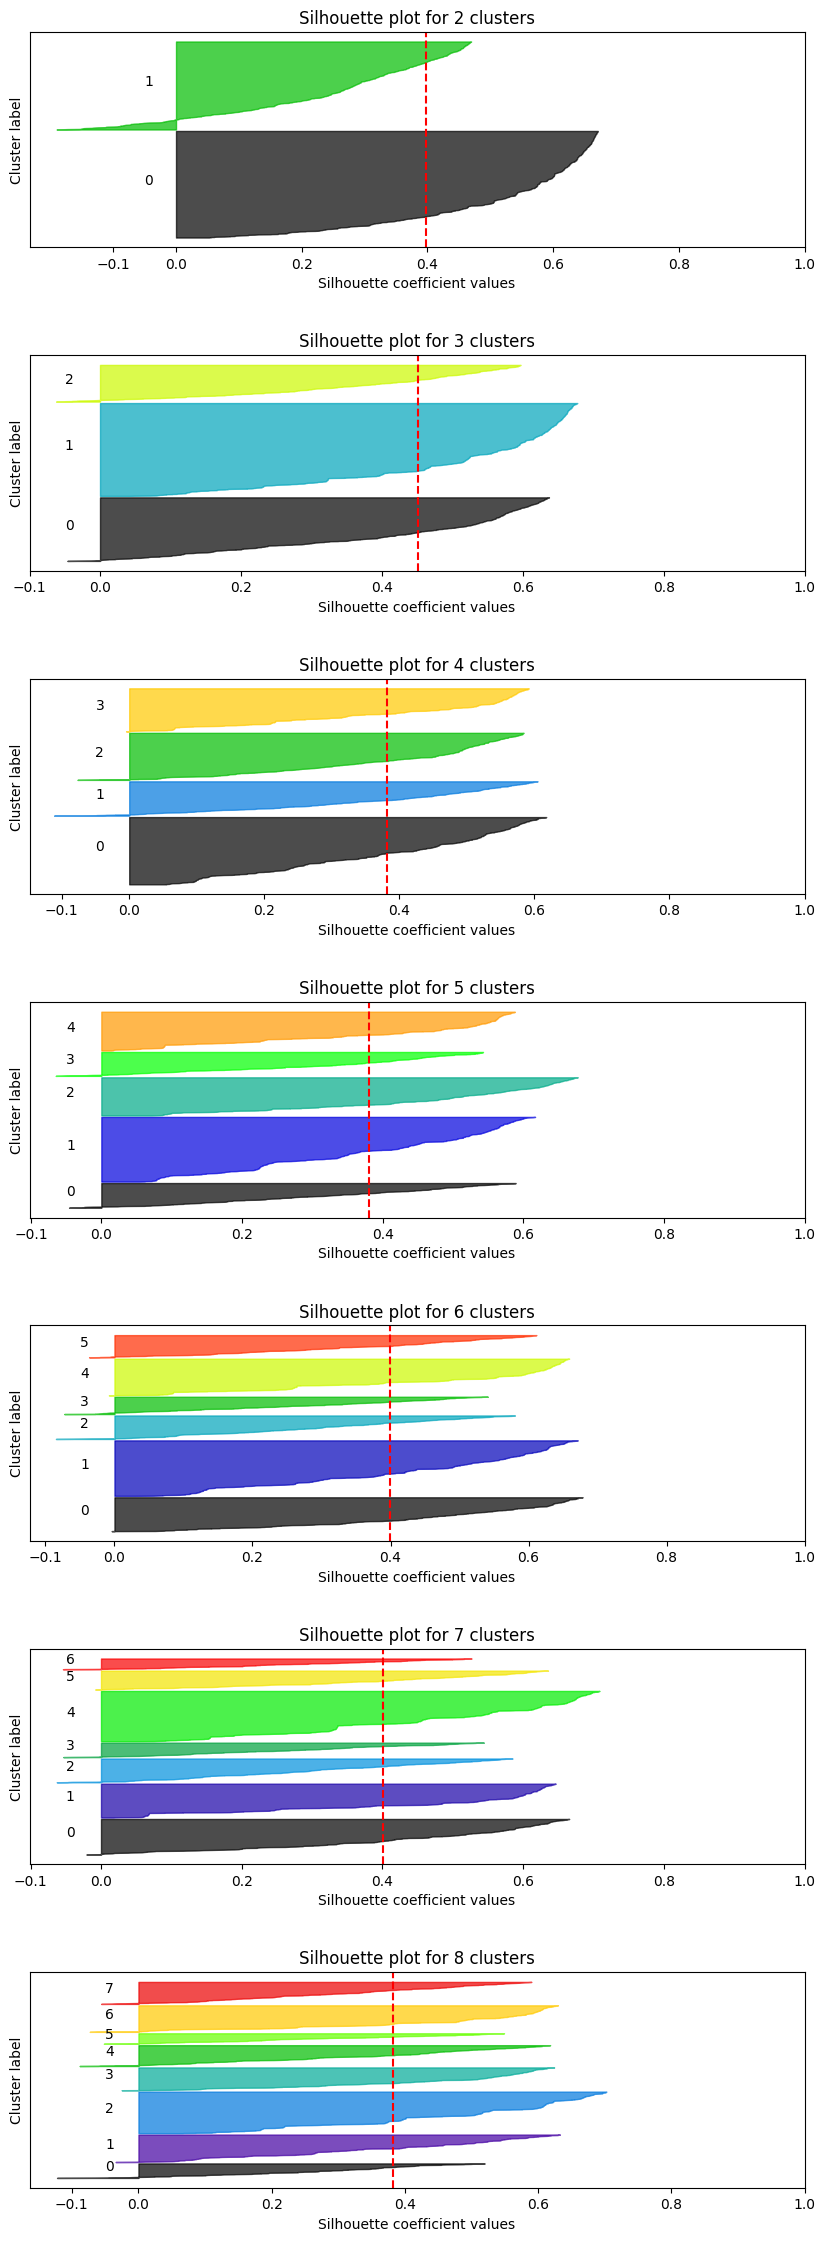

In [42]:
# generate the kmean silhouette plot
# Create subplot grid
range_n_clusters = [2, 3, 4, 5, 6,7,8]
fig, ax = plt.subplots(len(range_n_clusters), 1, figsize=(10, len(range_n_clusters) * 4))

# Add vertical spacing between subplots
plt.subplots_adjust(hspace=0.5)  # Adjust the spacing as needed

for i, n_clusters in enumerate(range_n_clusters):
    # Initialize KMeans with n_clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, init='k-means++')
    cluster_labels = kmeans.fit_predict(X1)

    # Compute silhouette scores
    silhouette_avg = silhouette_score(X1, cluster_labels)
    sample_silhouette_values = silhouette_samples(X1, cluster_labels)

    # Print silhouette score for each cluster
    print(f'Silhouette score for {n_clusters} clusters: {silhouette_avg}')

    y_lower = 10
    for j in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster j
        jth_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]
        jth_cluster_silhouette_values.sort()

        size_cluster_j = jth_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        # Color each cluster silhouette plot
        color = plt.cm.nipy_spectral(float(j) / n_clusters)
        ax[i].fill_betweenx(np.arange(y_lower, y_upper),
                             0, jth_cluster_silhouette_values,
                             facecolor=color, edgecolor=color, alpha=0.7)

        # Label silhouette plots with their cluster numbers at the middle
        ax[i].text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))

        # Compute new y_lower for the next plot
        y_lower = y_upper + 10

    ax[i].set_title(f'Silhouette plot for {n_clusters} clusters')
    ax[i].set_xlabel('Silhouette coefficient values')
    ax[i].set_ylabel('Cluster label')

    # The vertical line for average silhouette score of all the values
    ax[i].axvline(x=silhouette_avg, color="red", linestyle="--")

    ax[i].set_yticks([])
    ax[i].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

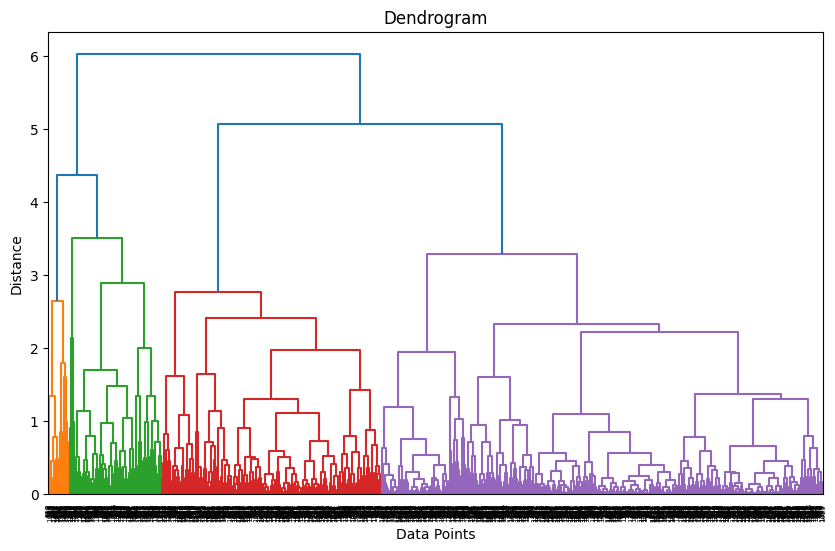

Cluster labels: [2 2 1 ... 0 2 2]


In [43]:
# agglomerative clustering model

# Perform Agglomerative Clustering
n_clusters = 4
linkage_method = 'complete'

# Fit agglomerative clustering model
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
cluster_labels = agg_cluster.fit_predict(X1)

# Visualize Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage(X1, method=linkage_method))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Print cluster labels
print("Cluster labels:", cluster_labels)

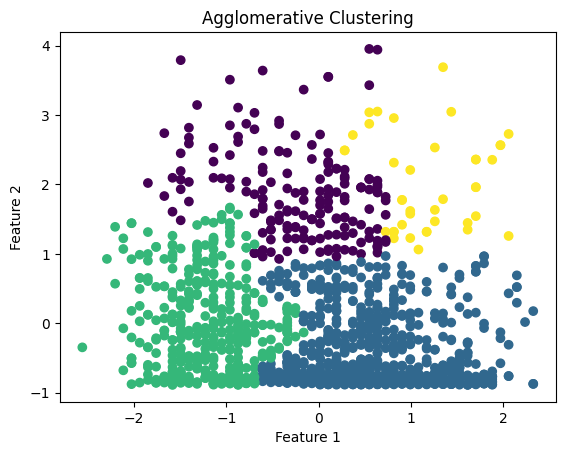

In [44]:
plt.scatter(X1[:, 0], X1[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

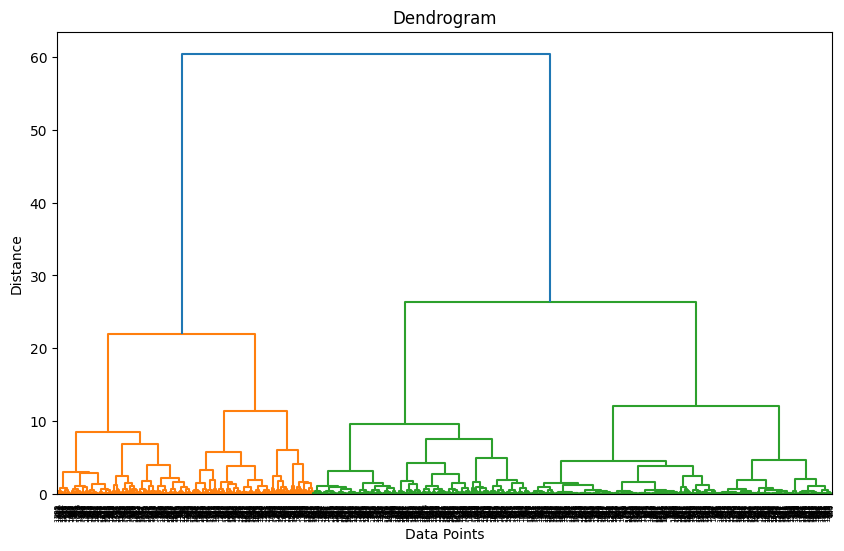

Cluster labels: [1 2 3 ... 1 3 2]


In [45]:
# agglomerative clustering model
# Preprocess Data (Scaling)

# Perform Agglomerative Clustering
n_clusters = 4
linkage_method = 'ward'

# Fit agglomerative clustering model
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
cluster_labels = agg_cluster.fit_predict(X2)

# Visualize Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage(X2, method=linkage_method))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Print cluster labels
print("Cluster labels:", cluster_labels)

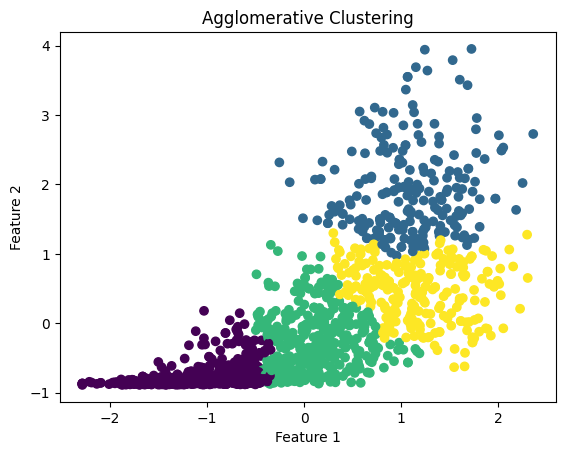

In [46]:
plt.scatter(X2[:, 0], X2[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

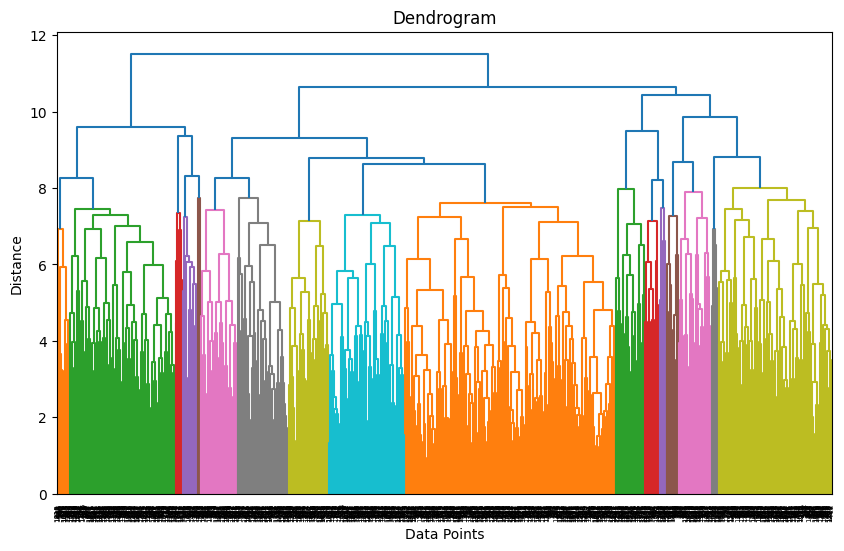

Cluster labels: [3 2 0 ... 1 1 1]


In [47]:
# agglomerative clustering model
# Preprocess Data (Scaling)

# Perform Agglomerative Clustering
linkage_method = 'complete'

# Fit agglomerative clustering model
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
cluster_labels = agg_cluster.fit_predict(df_scaled)

# Visualize Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage(df_scaled, method=linkage_method))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Print cluster labels
print("Cluster labels:", cluster_labels)

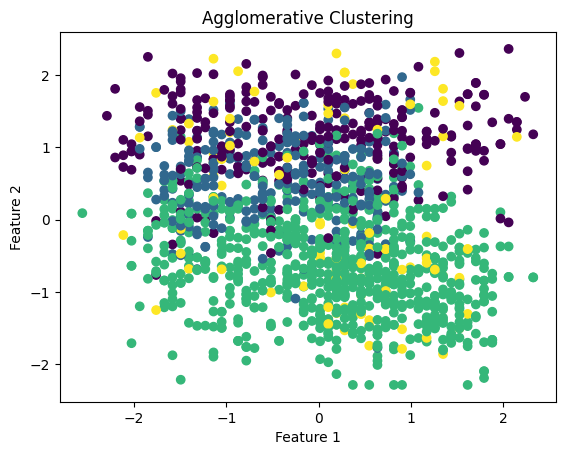

In [48]:
# Visualize the clusters
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [49]:
pca2 = PCA(n_components=2)
X_pca = pca2.fit_transform(df_scaled)
print("Explained Variance: %s" % (pca.explained_variance_ratio_))
print("Components:\n", pca.components_)

Explained Variance: [2.30493972e-01 1.01369012e-01 9.21869304e-02 8.13034298e-02
 7.58595769e-02 6.58240184e-02 6.35894223e-02 6.11529300e-02
 5.63466558e-02 4.18629460e-02 3.20446719e-02 2.63680410e-02
 2.10520481e-02 1.94537308e-02 1.43304161e-02 1.00152968e-02
 6.74690140e-03 1.43743603e-32 4.93513295e-33 1.23620013e-33
 1.23620013e-33 1.23620013e-33 1.23620013e-33 1.23620013e-33
 1.23620013e-33 1.23620013e-33 1.23620013e-33 1.23620013e-33
 1.23620013e-33 1.23620013e-33 1.23620013e-33 1.23620013e-33
 1.23620013e-33]
Components:
 [[-1.30507996e-01  4.27861633e-01 -3.42284334e-01 ...  7.64158560e-03
  -0.00000000e+00 -0.00000000e+00]
 [-2.99941552e-01 -7.01986241e-02  1.02724004e-01 ...  8.57183514e-02
   0.00000000e+00  0.00000000e+00]
 [ 6.90115578e-02 -2.26758946e-02  4.47032346e-02 ... -1.11252300e-01
   0.00000000e+00  0.00000000e+00]
 ...
 [-0.00000000e+00  7.43386563e-46 -3.39270013e-46 ...  3.28899051e-33
  -0.00000000e+00 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.

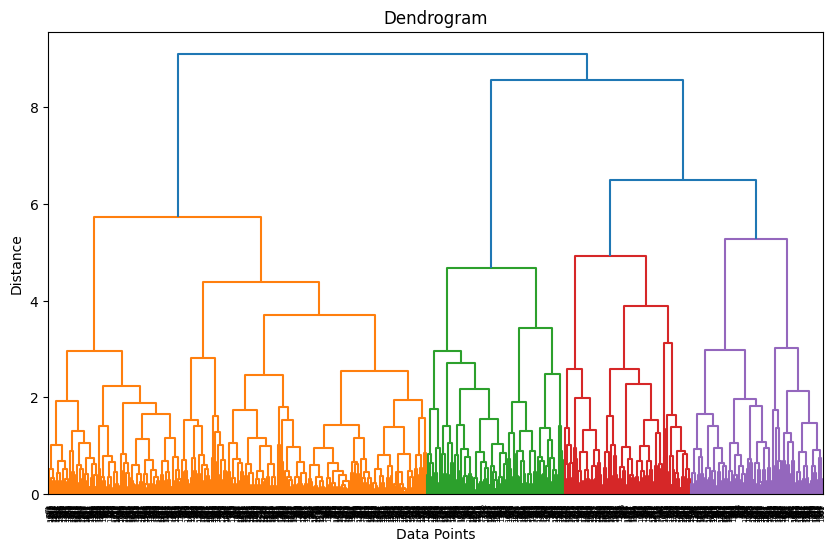

Cluster labels: [2 0 2 ... 1 3 1]


In [50]:
#agglomerative clustering model

# Perform Agglomerative Clustering

linkage_method = 'complete'

# Fit agglomerative clustering model
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
cluster_labels = agg_cluster.fit_predict(X_pca)

# Visualize Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage(X_pca, method=linkage_method))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Print cluster labels
print("Cluster labels:", cluster_labels)

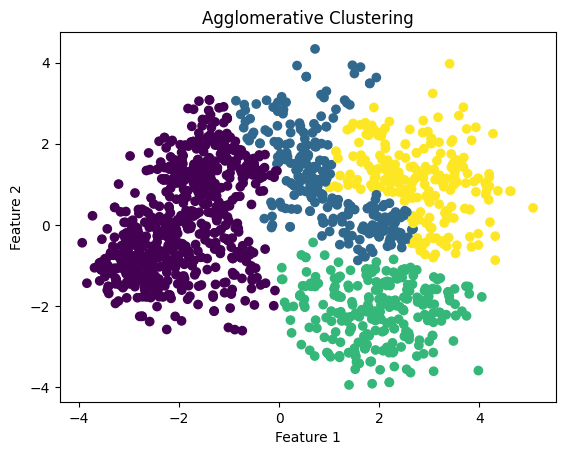

In [51]:
# Visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()